<h2 style="color:blue" align="left"> Predicting House Prices In Bengaluru </h2>

- What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor -- the price? Now with the lingering impact of demonetization, the enforcement of the Real Estate (Regulation and Development) Act (RERA), and the lack of trust in property developers in the city, housing units sold across India in 2017 dropped by 7 percent. In fact, the property prices in Bengaluru fell by almost 5 percent in the second half of 2017, said a study published by property consultancy Knight Frank. For example, for a potential homeowner, over 9,000 apartment projects and flats for sale are available in the range of ₹42-52 lakh, followed by over 7,100 apartments that are in the ₹52-62 lakh budget segment, says a report by property website Makaan. According to the study, there are over 5,000 projects in the ₹15-25 lakh budget segment followed by those in the ₹34-43 lakh budget category. Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.   So what determines the property prices in Namma Bengaluru?


- **Data : The train and test** data will consist of various features that describe that property in Bengaluru. This is an actual data set that is curated over months of primary & secondary research by our team. Each row contains fixed size object of features.


- There are 9 features and each feature can be accessed by its name. 

|Feature          |Description                                                                                                |
|---------------  |-----------------------------------------------------------------------------------------------------------|
|Area_type        |Describes the area Availability - when it can be possessed or when it is ready(categorical and time-series)|
|Location         |where it is located in Bengaluru                                                                           |
|Price            |Value of the property in lakhs(INR)                                                                        |
|Size             |in BHK or Bedroom (1-10 or more)                                                                           |
|Society          |to which society it belongs                                                                                |
|Total_sqft       |size of the property in sq.ft                                                                              |
|Bath             |No. of bathrooms                                                                                           |
|Balcony          |No. of the balcony                                                                                         |


- Problem Statement With the given **9 features(categorical and continuous)** build a model to **predict the price of houses in Bengaluru.**

<h2 style="color:blue" align="left"> 1. Import necessary Libraries </h2>

In [45]:
# Read Data
import numpy as np     # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd    # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)
from scipy import stats
from scipy.stats import norm

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib
%matplotlib inline

# style
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn

import warnings                                                          # Ignore Warnings
warnings.filterwarnings("ignore")

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score

<h2 style="color:blue" align="left"> 2. Load data </h2>

In [3]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [4]:
display(train.head())
display(test.head())

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN


In [5]:
display(train.shape)
display(test.shape)

(13320, 9)

(1480, 9)

In [6]:
train_original = train.copy()
test_original = test.copy()

In [7]:
display(train.dtypes)

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [8]:
test.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

<h2 style="color:blue" align="left"> 3. EDA (Exploratory Data Analysis) </h2>

- EDA is a way of **Visualizing, Summarizing and interpreting** the information that is **hidden in rows and column** format.

### 1. Find Missing Values

#### Mising Value Checking
- I use five function for mising value checking
   - insull()
      - If any value is null return True
      - Otherewise return False
      
   - isnull().any()
      - If any columns have null value return True
      - Otherewise return False
      
   - isnull().sum()
      - If any columns have null value return how many null values have
      - If no null value present return 0
      
   - missingno()
      - Showing values by bar graph
      
   - Heatmap()
      - Showing values by graph

In [9]:
display(train.isnull().sum())
display(test.isnull().sum())

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

area_type          0
availability       0
location           0
size               2
society          626
total_sqft         0
bath               7
balcony           69
price           1480
dtype: int64

- society column has lots of missing values, 41.3 %.
- Maybe all these house doesn't belong to any society.
- Or, because of some data gathering problem these records has missing society value.
- Or, it could be both of them.

In [42]:
print("percentage of Missing Values 'Society' Column In Train dataset :",int(5502/train.shape[0]*100),"%")
print("percentage of Missing Values 'Society' Column In Test dataset :",int(626/test.shape[0]*100),"%")

percentage of Missing Values 'Society' Column In Train dataset : 41 %
percentage of Missing Values 'Society' Column In Test dataset : 42 %


- **Reason For Missing Values**
  - Maybe all these house doesn't belong to any society.
  - Or, because of some data gathering problem these records has missing society value.

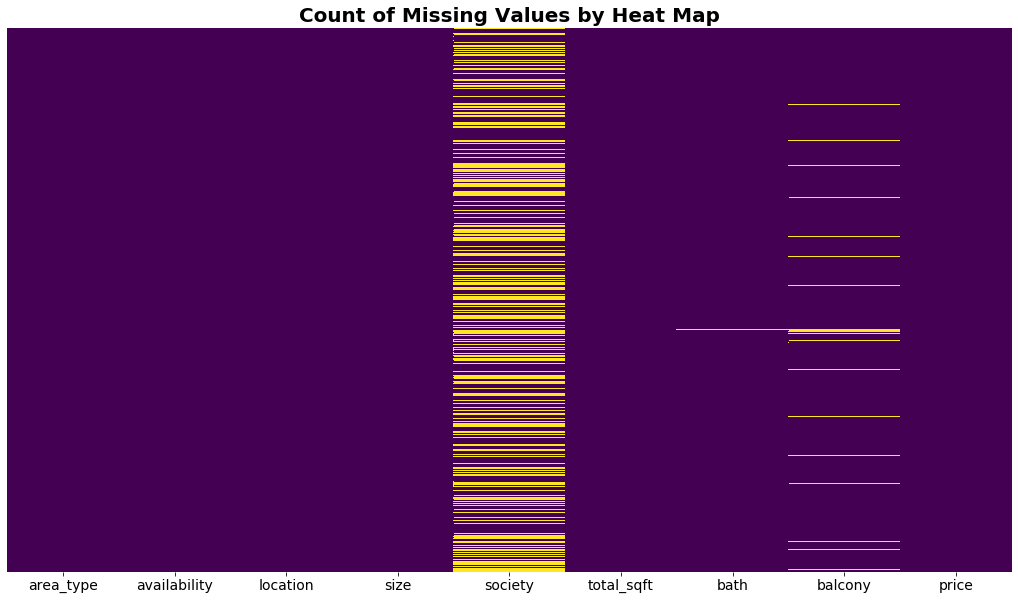

In [21]:
# Missing value representation by Heatmap
plt.figure(figsize=(18,10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.xticks(fontsize=14)
plt.title('Count of Missing Values by Heat Map', fontsize=20, fontweight = 'bold')
plt.show()

### 2. Find Features with one value

In [22]:
for column in train.columns:
    print(column,train[column].nunique())

area_type 4
availability 81
location 1305
size 31
society 2688
total_sqft 2117
bath 19
balcony 4
price 1994


In [23]:
for column in test.columns:
    print(column,test[column].nunique())

area_type 4
availability 51
location 495
size 21
society 594
total_sqft 666
bath 11
balcony 4
price 0


- All columns have **more than 1 unique value.** No feature found with one value.

### 8. Explore the Numerical Features

In [30]:
numerical_features = train.select_dtypes(exclude='object')
numerical_features

,bath,balcony,price
0,2.0,1.0,39.07
1,5.0,3.0,120.00
2,2.0,3.0,62.00
3,3.0,1.0,95.00
4,2.0,1.0,51.00
...,...,...,...
13315,4.0,0.0,231.00
13316,5.0,NaN,400.00
13317,2.0,1.0,60.00
13318,4.0,1.0,488.00


### 9. Find Discrete Numerical Features

In [31]:
discrete_feature = [feature for feature in numerical_features if len(train[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


### 10. Find Continous Numerical Features

In [32]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature+['price']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 0


### 11. Distribution of Continous Numerical Features (Ingredients)

TypeError: can't multiply sequence by non-int of type 'float'

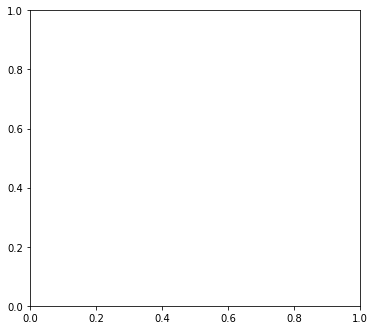

In [25]:
# plot a univariate distribution of continues observations
import itertools
columns = [i for i in train.columns if i not in 'price']
length = len(columns)
cs = ["b","r","g","c","m","k","lime","c"]

fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(columns, range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(train[i], color=k, rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(), linestyle="dashed", label="mean", color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

## Target Variable : Price

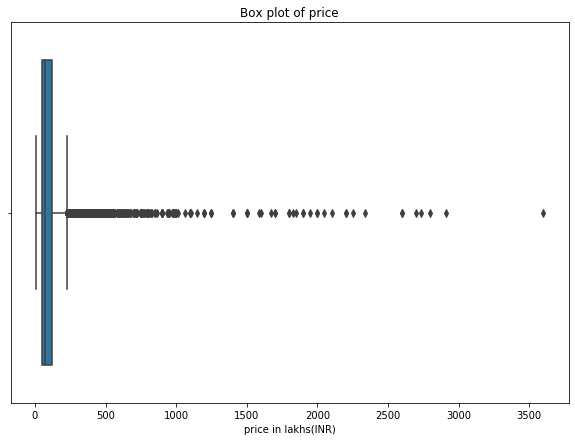

In [10]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(train['price'], ax=ax)
ax.set(xlabel= 'price in lakhs(INR)', title='Box plot of price')
plt.show()

In [11]:
# find mode (most frequent occuring price value) of price
train['price'].mode()

0    75.0
dtype: float64

In [12]:
print('Descriptive statistics of price column:\n')
print(train['price'].describe())

Descriptive statistics of price column:

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64


- From above box plot and descriptive statistics we can say:-

### Measure of spread:
- price ranges from minimum **8 lakh to maximum 3600 lakh.**


- is 148.97, which is quite high given 25% and 75% values. Which indicates high skewness of the data.
- std gives measure of spread around mean value.
- Here lower quartile (Q1) (25%) value is 50 lakh and upper quartile (Q3) (75%) value is 120 lakh.
- That means 50% of house has price betwen 50 lakh to 120 lakh.
- : Q3 - Q1 = 120 - 50 = 70 lakh.
- The IQR is often seen as a better measure of spread than the range as it is not affected by outliers.
- : In box plot we can see whiskers (Lines extending from box), price outside of this whiskers are considered outliers.
- Anything outside of the range [Q1 - 1.5 IQR, Q3 + 1.5 IQR] is outlier.
- Here any price value below 0 and above 295 lakh is considered outlier.
### Measure of central tendency:
- Data has (mean) price value of 112.56 lakhs and (50% quartile) (Q2) price value of 72 lakhs.

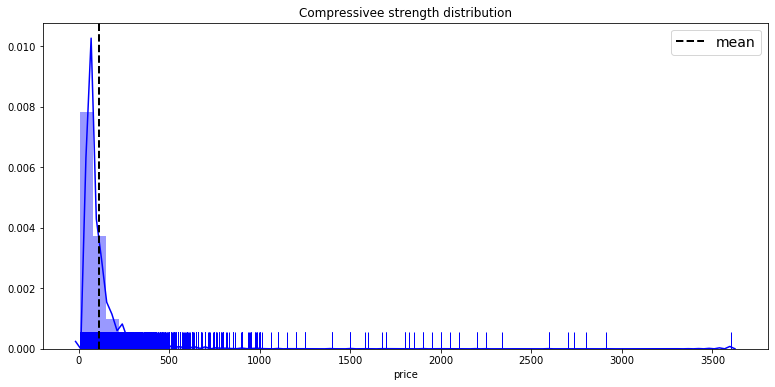

In [27]:
plt.figure(figsize=(13,6))
sns.distplot(train["price"], color="b", rug=True)
plt.axvline(train["price"].mean(), linestyle="dashed", color="k", label='mean', linewidth=2)
plt.legend(loc="best", prop={"size":14})
plt.title("Compressivee strength distribution")
plt.show()

### 12. Relation between Continous numerical Features and Labels

In [34]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    data=train.copy()
    ax = plt.subplot(12,3,plotnumber)
    plt.scatter(train[feature],train['price'])
    plt.xlabel(feature)
    plt.ylabel('strength')
    plt.title(feature)
    plotnumber+=1
plt.show()

<Figure size 1440x4320 with 0 Axes>

### 13. Find Outliers in numerical features

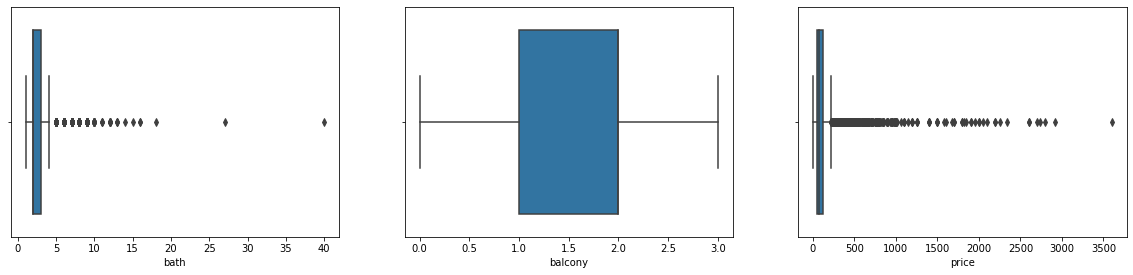

In [35]:
# boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(train[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

In [13]:
# Find number of outliers
print("{0: .2f} of records has outlier price".format(((train['price'] > 295).sum() / train.shape[0]) * 100))

 5.99 of records has outlier price


### 14. Explore the Correlation between numerical features

In [36]:
## Checking for correlation
train.corr()

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


<h2 style="color:green" align="left"> 5. Data Visualization </h2>

- Used below **visualisation libraries**


     1. Matplotlib
     2. Seaborn (statistical data visualization)

### 1. Categorical

- Categorical data :


     1. Numerical Summaries
     2. Histograms
     3. Pie Charts
     

### 2. Univariate Analysis

- Univariate Analysis : data consists of **only one variable (only x value)**.


     1. Line Plots / Bar Charts
     2. Histograms
     3. Box Plots 
     4. Count Plots
     5. Descriptive Statistics techniques
     6. Violin Plot

### Univariate analysis
#### price (target variable)

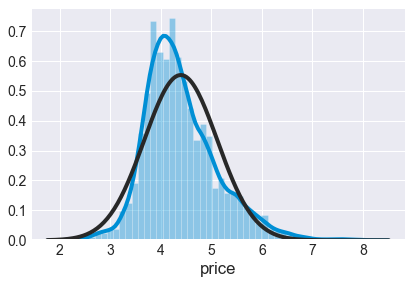

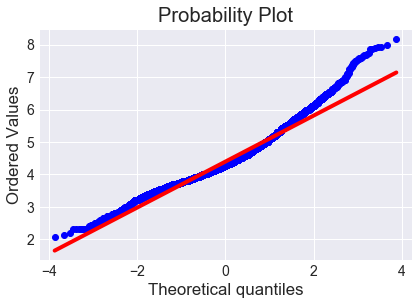

In [52]:
# histogram and normal probability plot
sns.distplot(train['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)

- Distribution of price is highly righ skewed, so we should use transformation like log, box-cox or arcsin square root for prediction.
- Most of the house price lies below 500 lakhs.
- There are outliers in this dataset. You can see from thoes virticle lines (same height dark blue sticks) in the plot are dense below 500.

- **Kurtosis** measures whether your dataset is heavy-tailed or light-tailed compared to a normal distribution. Data sets with high kurtosis have heavy tails and more outliers and data sets with low kurtosis tend to have light tails and fewer outliers.

In [40]:
# skewness and kurtosis
print("Skewness: %f" % train['price'].skew())
print("Kurtosis: %f" % train['price'].kurt())

Skewness: 8.064469
Kurtosis: 108.166513


In [43]:
# applying log transformation
train['price'] = np.log(train['price'])

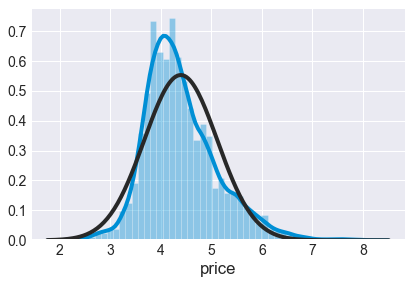

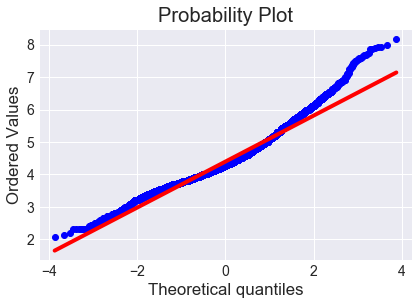

In [46]:
# transformed histogram and normal probability plot
sns.distplot(train['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)

AttributeError: 'Series' object has no attribute 'get_values'

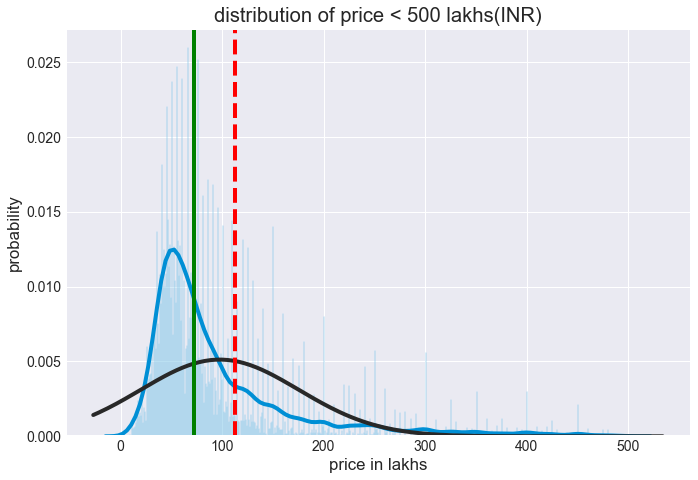

In [41]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.distplot(train[train['price'] < 500]['price'], kde=True, ax=ax, bins=500, fit=stats.norm)
ax.set(title= 'distribution of price < 500 lakhs(INR)', xlabel='price in lakhs', ylabel='probability')
ax.axvline(train['price'].mean(), color='r', linestyle='--')
ax.axvline(train['price'].median(), color='g', linestyle='-')
ax.axvline(train['price'].mode().get_values()[0], color='y', linestyle='-')
plt.legend({'Normal distribution': stats.norm, 'Mean':train['price'].mean(),'Median':train['price'].median(), 'Mode': train['price'].mode().get_values()[0]})
plt.show()

In [14]:
# For plotting bar graph of categorical variable for both train and test dataset on same figure with percentage. 
def plot_train_test_norm_bar(train_se, test_se, title, figsize=(12,7)):
    fig, ax = plt.subplots(ncols=2, figsize=figsize)
    fig.suptitle(title)
    tr_va_co = train_se.fillna('missing').value_counts(normalize=True)
    te_va_co = test_se.fillna('missing').value_counts(normalize=True)
    sns.barplot(y = tr_va_co.index, x= tr_va_co.values*100, ax=ax[0])
    ax[0].set(title='Train dataset', xlabel= 'percentage', ylabel=str(train_se.name))
    sns.barplot(y = te_va_co.index, x= te_va_co.values*100, ax=ax[1])
    ax[1].set(title='Test dataset', xlabel='percentage')
    plt.plot()

### bath

In [10]:
display(train['bath'].value_counts())
display(test['bath'].value_counts())

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64

2.0     744
3.0     371
4.0     149
1.0      83
5.0      62
6.0      30
7.0      11
8.0       9
9.0       9
10.0      4
16.0      1
Name: bath, dtype: int64

In [11]:
train['bath'] = train['bath'].fillna(2)
test['bath'] = test['bath'].fillna(2)

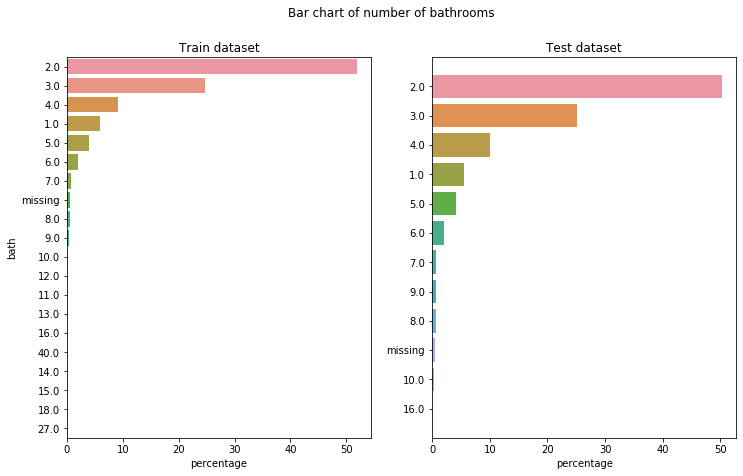

In [16]:
plot_train_test_norm_bar(train['bath'], test['bath'], 'Bar chart of number of bathrooms')

- 50% of houses has 2 bathrooms.
- There are also some house which has more than 10 bathrooms.
- Test dataset doesn't contain some bath records which are present in Train dataset. e.g. 40, 40, 18, 27 etc.

### balcony

In [12]:
display(train['balcony'].value_counts())
display(test['balcony'].value_counts())

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

1.0    547
2.0    545
3.0    189
0.0    130
Name: balcony, dtype: int64

In [13]:
train['balcony'].median()

2.0

In [14]:
test['balcony'].median()

2.0

In [15]:
train['balcony'] = train['balcony'].fillna(2)
test['balcony'] = test['balcony'].fillna(2)

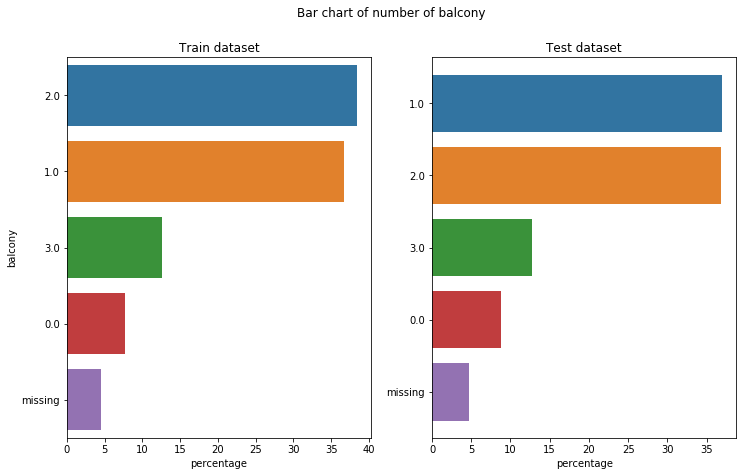

In [15]:
plot_train_test_norm_bar(train['balcony'], test['balcony'], "Bar chart of number of balcony")

- There are more houses which has 1 or 2 balcony, around 37% each.
- Around 4% of the record has missing balcony value in both train and test dataset.

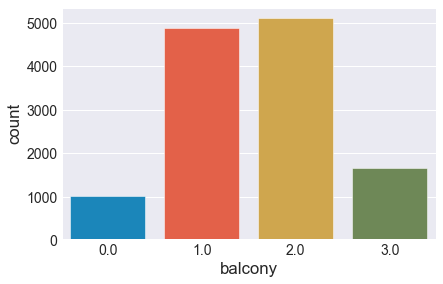

In [54]:
sns.countplot(x='balcony',data=train)

### size

In [16]:
display(train['size'].value_counts())
display(test['size'].value_counts())

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
11 BHK           2
10 BHK           2
12 Bedroom       1
16 BHK           1
18 Bedroom       1
13 BHK           1
14 BHK           1
27 BHK           1
19 BHK           1
43 Bedroom       1
Name: size, dtype: int64

2 BHK         540
3 BHK         478
4 Bedroom      92
4 BHK          82
3 Bedroom      66
1 BHK          54
5 Bedroom      41
2 Bedroom      39
1 Bedroom      17
6 Bedroom      17
7 Bedroom      12
8 Bedroom      10
9 Bedroom       8
6 BHK           5
9 BHK           5
8 BHK           3
10 Bedroom      3
1 RK            2
5 BHK           2
7 BHK           1
16 Bedroom      1
Name: size, dtype: int64

In [17]:
train['size'] = train['size'].fillna(train['size'].mode()[0])
test['size'] = test['size'].fillna(test['size'].mode()[0])

### location

In [18]:
display(train['location'].value_counts())
display(test['location'].value_counts())

Whitefield               540
Sarjapur  Road           399
Electronic City          302
Kanakpura Road           273
Thanisandra              234
                        ... 
Prakruthi Nagar            1
7th Block Koramangala      1
Chambenahalli              1
Sector 4 HSR Layout        1
HOSUR RMAIN ROAD           1
Name: location, Length: 1305, dtype: int64

Whitefield                         51
Thanisandra                        43
Sarjapur  Road                     38
Electronic City                    35
Kanakpura Road                     25
                                   ..
Lakshmi Layout                      1
Kengeri Satellite Town Stage II     1
Giri Nagar                          1
Chikkasanne                         1
Sompura                             1
Name: location, Length: 495, dtype: int64

In [19]:
train['location'] = train['location'].fillna(train['location'].mode()[0])

In [20]:
display(train.isnull().sum())
display(test.isnull().sum())

area_type          0
availability       0
location           0
size               0
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

area_type          0
availability       0
location           0
size               0
society          626
total_sqft         0
bath               0
balcony            0
price           1480
dtype: int64

## EDA (Exploratory Data Analysis)

### 1. total_sqft

In [20]:
display(train['total_sqft'].nunique())
display(test['total_sqft'].nunique())

2117

666

In [21]:
display(train['total_sqft'].unique())
display(test['total_sqft'].unique())

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

array(['1225', '2400', '1650', '1322', '1161', '760', '4500', '960',
       '1569', '1445', '1505', '3122', '1096', '1450', '2884', '604',
       '1170', '957', '2900', '1160', '1725', '450', '1500', '1824',
       '2250', '1698', '1400', '1200', '1902.55', '1150', '1430', '1215',
       '3083', '1025', '1353', '6369', '1085', '1289', '2300',
       '1691 - 2170', '1021', '1750', '1404', '1060', '1029', '850',
       '3565', '2134', '1703', '1190', '700', '929', '955', '1843',
       '1250', '1893', '1240', '1151', '1560', '600', '1050', '1063',
       '2465', '900', '1255', '2091', '1477', '2145', '1314', '1860',
       '1095', '1295', '2000', '1386', '950', '843', '2439', '1280',
       '1010', '793', '1100', '40', '1220', '630', '1444', '1710', '800',
       '1745', '870', '1393', '1000', '1371', '2140', '1580', '1368',
       '1128', '1171', '1564', '1345', '1512', '775', '1090', '969',
       '1483', '1252', '3375', '3650', '2440', '1680', '1990', '1523',
       '4930', '1195', '5

### Preprocess the column "total_sqft"
- As all the given values are not measured in 'square feet', we have to preprocess some of the values in the column.
- Some of them are also measured in square meters, square yards, perch, acres, cents, guntha and grounds.
- So, convert all of them into square feet to make the data more consistent.

In [23]:
display(train['total_sqft'].value_counts())
display(test['total_sqft'].value_counts())

1200               843
1100               221
1500               205
2400               196
600                180
                  ... 
3103 - 3890          1
2400 - 2600          1
361.33Sq. Yards      1
1234.6               1
9200                 1
Name: total_sqft, Length: 2117, dtype: int64

1200    97
1500    33
2400    28
1000    27
600     20
        ..
1313     1
1608     1
1736     1
2572     1
1779     1
Name: total_sqft, Length: 666, dtype: int64

### 2. area_type

In [21]:
display(train['area_type'].value_counts())
display(test['area_type'].value_counts())

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

Super built-up  Area    946
Built-up  Area          270
Plot  Area              254
Carpet  Area             10
Name: area_type, dtype: int64

In [22]:
train['area_type'] = train['area_type'].map({'Super built-up  Area': 0, 'Built-up  Area': 1,
                                             'Plot  Area': 2, 'Carpet  Area': 3})

test['area_type'] = test['area_type'].map({'Super built-up  Area': 0, 'Built-up  Area': 1,
                                           'Plot  Area': 2, 'Carpet  Area': 3})

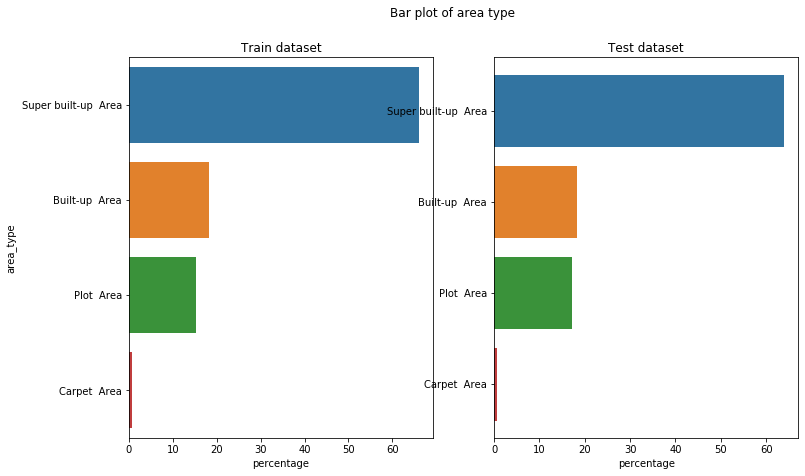

In [17]:
plot_train_test_norm_bar(train['area_type'], test['area_type'], "Bar plot of area type")

- Around 65% of house has super built up area type both in Train and Test dataset.

### 3. availability

In [23]:
train['availability'].nunique()

81

In [24]:
display(train['availability'].unique())
display(test['availability'].unique())

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

array(['Ready To Move', '18-Apr', '18-Dec', '18-Jul', '19-Dec', '19-Oct',
       '17-Dec', '18-May', '22-Jun', '18-Feb', '18-Aug', '18-Jun',
       '18-Mar', '20-Dec', '17-Jun', '21-Mar', '17-Jul', '15-Oct',
       'Immediate Possession', '19-Sep', '17-Jan', '19-Jun', '21-May',
       '22-May', '18-Oct', '18-Sep', '21-Dec', '18-Nov', '17-Nov',
       '19-Jan', '17-May', '19-Mar', '17-Sep', '17-Apr', '20-Jul',
       '19-Nov', '21-Jan', '21-Feb', '20-Jun', '19-May', '21-Jul',
       '20-Jan', '18-Jan', '19-Feb', '19-Aug', '16-Jul', '19-Jul',
       '17-Aug', '21-Jun', '16-Apr', '20-Aug'], dtype=object)

In [25]:
display(train['availability'].value_counts().head(10))
display(test['availability'].value_counts().head(10))

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
19-Dec             185
18-Jul             143
18-Mar             131
18-Jun              99
20-Dec              98
Name: availability, dtype: int64

Ready To Move    1162
18-Dec             44
19-Dec             33
18-May             29
18-Apr             25
18-Aug             25
18-Jul             17
18-Mar             16
20-Dec             11
21-Dec             10
Name: availability, dtype: int64

In [26]:
def replace_availabilty(my_string):
    if my_string == 'Ready To Move':
        return 0
    elif my_string == 'Immediate Possession':
        return 1
    else:
        return 2

In [27]:
train['availability'] = train.availability.apply(replace_availabilty)
test['availability'] = test.availability.apply(replace_availabilty)

### 4. location

In [28]:
display(train['location'].nunique())
display(test['location'].nunique())

1305

495

In [29]:
display(train['location'].unique())
display(test['location'].unique())

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

array(['Brookefield', 'Akshaya Nagar', 'Hennur Road', 'Kodichikkanahalli',
       'Konanakunte', '5th Phase JP Nagar', 'Vijayanagar', 'BEML Layout',
       'Thanisandra', 'NRI Layout', 'Sarjapur', 'Thigalarapalya',
       'Kanakapura', 'Narayanapura', 'Magadi Road', 'Kogilu',
       'BTM 2nd Stage', 'Hebbal Kempapura', 'Electronic City',
       'Hosa Road', 'Kengeri Satellite Town Stage 1', 'Begur Road',
       'Harlur', 'Rachenahalli', 'Ayappa Nagar', 'Whitefield',
       'Dasarahalli', 'JP Nagar', 'Sarjapur  Road', 'Kammagondahalli',
       'Jalahalli', 'Marathahalli', '4th Block Koramangala', 'Hoodi',
       'Horamavu Agara', 'Hulimavu', 'Frazer Town', 'Vittasandra',
       'KR Puram', 'C P Cassia Apartment,', 'Neeladri Nagar',
       'CV Raman Nagar', 'Subramanyapura', 'Bommasandra', 'Koramangala',
       'Tumkur Road', 'Kanakpura Road', 'Anandapura',
       'Horamavu Banaswadi', 'Anjanapura', 'Binny Pete', 'TC Palaya',
       'Hennur', 'Varthur', 'Kadugodi', 'Cox Town', 'Choodasan

In [30]:
train[~train.location.notnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price


In [31]:
train['location'] = train['location'].fillna('Location not provided')

In [32]:
location_encoder = LabelEncoder()
location_encoder.fit(train['location'].append(test['location']))
train['location'] = location_encoder.transform(train['location'])

In [33]:
test['location'] = location_encoder.transform(test['location'].astype('str'))

### 5. size

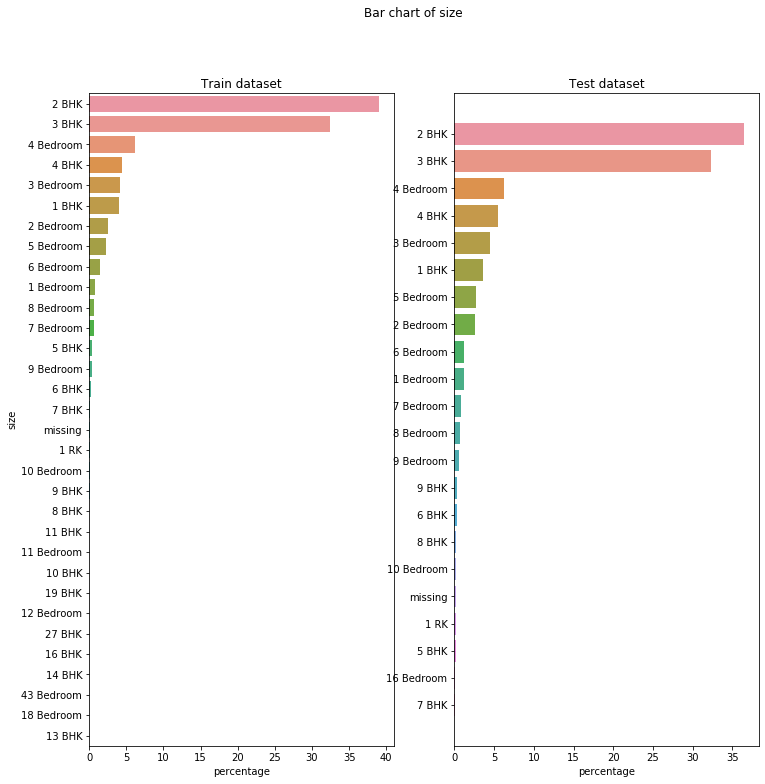

In [18]:
plot_train_test_norm_bar(train['size'], test['size'], "Bar chart of size", (12, 12))

- Most of the house are 2BHK or 3BHK, around 70% combined.
- some of the size types are not present in train data which are present in test data.
- some of the size types are not present in test data which are present in train data.

In [34]:
display(train['size'].nunique())
display(test['size'].nunique())

31

21

In [35]:
display(train['size'].unique())
display(test['size'].unique())

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

array(['2 BHK', '9 Bedroom', '4 Bedroom', '3 BHK', '4 BHK', '1 BHK',
       '3 Bedroom', '1 Bedroom', '2 Bedroom', '5 Bedroom', '7 BHK',
       '8 Bedroom', '6 Bedroom', '7 Bedroom', '1 RK', '5 BHK', '9 BHK',
       '6 BHK', '8 BHK', '10 Bedroom', '16 Bedroom'], dtype=object)

In [36]:
train['size'] = train['size'].map({'2 BHK':2, '4 Bedroom':4, '3 BHK':3, '4 BHK':4, '6 Bedroom':6, '3 Bedroom':3,
                                   '1 BHK':1, '1 RK':1, '1 Bedroom':1, '8 Bedroom':8, '2 Bedroom':2,
                                   '7 Bedroom':7, '5 BHK':5, '7 BHK':7, '6 BHK':6, '5 Bedroom':5, '11 BHK':11,
                                   '9 BHK':9, '9 Bedroom':9, '27 BHK':27, '10 Bedroom':10, '11 Bedroom':11,
                                   '10 BHK':10, '19 BHK':19, '16 BHK':16, '43 Bedroom':43, '14 BHK':14, '8 BHK':8,
                                   '12 Bedroom':12, '13 BHK':13, '18 Bedroom':18})

test['size'] = test['size'].map({'2 BHK':2, '9 Bedroom':9, '4 Bedroom':4, '3 BHK':3, '4 BHK':4, '1 BHK':1,
                                 '3 Bedroom':3, '1 Bedroom':1, '2 Bedroom':2, '5 Bedroom':5, '7 BHK':7,
                                 '8 Bedroom':8, '6 Bedroom':6, '7 Bedroom':7, '1 RK':1, '5 BHK':5, '9 BHK':9,
                                 '6 BHK':6, '8 BHK':8, '10 Bedroom':10, '16 Bedroom':16})

In [37]:
display(train['size'].unique())
display(test['size'].unique())

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

array([ 2,  9,  4,  3,  1,  5,  7,  8,  6, 10, 16], dtype=int64)

### 6. society

In [45]:
display(train['society'].nunique())
display(test['society'].nunique())

2688

594

In [46]:
display(train['society'].unique())
display(test['society'].unique())

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

array(['Roeekbl', nan, 'Saandtt', 'Winerri', 'AmageSa', 'G aceer',
       'Soitya ', 'Maity W', 'Maensar', 'Prtanha', 'Gaodsch', 'Vrenty ',
       'Mahesr ', 'Dhalsh ', 'SrEndPo', 'Leino C', 'Kuave E', 'Sooneoo',
       'BSensth', 'Contsci', 'Tahtsla', 'Niborik', 'Caycend', 'Klark L',
       'NiarkHy', 'Asareur', 'Prlla C', 'Prtates', 'Srshq T', 'Prldsri',
       'SSestth', 'PuandHi', 'GoAirej', 'DLhtsnd', 'Shestlo', 'Shateor',
       'GoityEt', 'Alestrb', 'DantsAp', 'Maidsr ', 'SheldGr', 'ColeyNa',
       'UnlisAc', 'Miiewa ', 'Somns T', 'Gantspa', 'Tavenew', 'Pride S',
       'Bhiya N', 'Prarkun', 'PuendWe', 'Prarkhi', 'NRowse ', 'S alsPe',
       'Goted U', 'Saaveri', 'Shileve', 'Aklia R', 'Assha A', 'Daives ',
       'Goues A', 'RMaanSa', 'Emine P', 'Vayali ', 'Grure S', 'NSnexav',
       'SSdhimr', 'Neisear', 'Cerdsga', 'Prersis', 'Riiew L', 'Paune F',
       'PrandHo', 'Soazak ', 'RAncyeg', 'Prityel', 'Brway G', 'ElaleSp',
       'Dhniaad', 'Crior E', 'Dieldli', 'Ieuseut', 'Pae 1

### Model Evaluation

In [38]:
train.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,0,2,430,2,Coomee,1056,2.0,1.0,39.07
1,2,0,325,4,Theanmp,2600,5.0,3.0,120.00
2,1,0,1219,3,NaN,1440,2.0,3.0,62.00
3,0,0,778,3,Soiewre,1521,3.0,1.0,95.00
4,0,0,736,2,NaN,1200,2.0,1.0,51.00


In [39]:
test.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,0,0,284,2,Roeekbl,1225,2.0,2.0,NaN
1,2,0,103,9,NaN,2400,9.0,2.0,NaN
2,2,2,534,4,Saandtt,1650,5.0,2.0,NaN
3,0,0,721,3,Winerri,1322,3.0,1.0,NaN
4,0,0,727,2,AmageSa,1161,2.0,1.0,NaN


In [41]:
numeric_cols_train = train.select_dtypes(include=[np.number])
display(numeric_cols_train.head())
print('\n')
numeric_cols_train.columns

,area_type,availability,location,size,bath,balcony,price
0,0,2,430,2,2.0,1.0,39.07
1,2,0,325,4,5.0,3.0,120.00
2,1,0,1219,3,2.0,3.0,62.00
3,0,0,778,3,3.0,1.0,95.00
4,0,0,736,2,2.0,1.0,51.00


Index(['area_type', 'availability', 'location', 'size', 'bath', 'balcony',
       'price'],
      dtype='object')

In [42]:
numeric_cols_test = test.select_dtypes(include=[np.number])
display(numeric_cols_test.head())
print('\n')
numeric_cols_test.columns

,area_type,availability,location,size,bath,balcony,price
0,0,0,284,2,2.0,2.0,NaN
1,2,0,103,9,9.0,2.0,NaN
2,2,2,534,4,5.0,2.0,NaN
3,0,0,721,3,3.0,1.0,NaN
4,0,0,727,2,2.0,1.0,NaN


Index(['area_type', 'availability', 'location', 'size', 'bath', 'balcony',
       'price'],
      dtype='object')

In [43]:
X = numeric_cols_train.iloc[:,:-1]
y = numeric_cols_train['price']

In [45]:
# split  data into training and testing sets of 80:20 ratio
# 20% of test size selected
# random_state is random seed
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=4)

In [46]:
# shape of X & Y test / train
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10656, 6) (2664, 6) (10656,) (2664,)


### Linear Regression / Lasso / Ridge

In [47]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [50]:
y_pred_LinReg = LinReg.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

In [51]:
print("Train Score {:.2f} & Test Score {:.2f}".format(LinReg.score(X_train, y_train), LinReg.score(X_test, y_test)))
print("Train Score {:.2f} & Test Score {:.2f}".format(lasso.score(X_train, y_train), lasso.score(X_test, y_test)))
print("Train Score {:.2f} & Test Score {:.2f}".format(ridge.score(X_train, y_train), ridge.score(X_test, y_test)))

Train Score 0.21 & Test Score 0.24
Train Score 0.21 & Test Score 0.24
Train Score 0.21 & Test Score 0.24


### Random Forest

In [52]:
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)

C:\Users\deepusuresh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [53]:
y_pred_xgb = rfc.predict(X_test)

In [54]:
print("Train Score {:.2f} & Test Score {:.2f}".format(rfc.score(X_train,y_train), rfc.score(X_test,y_test)))

Train Score 0.86 & Test Score 0.26


In [ ]:
rf = RandomForestRegressor(n_estimators=600,
                             max_depth= 5,
                             max_leaf_nodes= 15,
                             min_samples_leaf= 3,
                             min_samples_split= 10,
                             random_state=0)
rf.fit(X_train, y_train)

In [ ]:
y_pred_xgb = rfc.predict(X_test)

In [ ]:
print("Train Score {:.2f} & Test Score {:.2f}".format(rfc.score(X_train,y_train), rfc.score(X_test,y_test)))

### XGBOOST

In [55]:
reg_xgb = xgboost.XGBRegressor()
reg_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [56]:
y_pred_xgb = reg_xgb.predict(X_test)

In [57]:
print("Train Score {:.2f} & Test Score {:.2f}".format(reg_xgb.score(X_train,y_train),reg_xgb.score(X_test,y_test)))

Train Score 0.87 & Test Score 0.44


In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

### LGBM

In [ ]:
lgb.plot_importance(model, figsize=(12, 25));

In [58]:
lgbm_model = LGBMRegressor(n_estimators=300)
lgbm_model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=300, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [59]:
y_pred_lgbm = lgbm_model.predict(X_test)

In [60]:
print("Train Score {:.2f} & Test Score {:.2f}".format(lgbm_model.score(X_train,y_train),lgbm_model.score(X_test,y_test)))

Train Score 0.69 & Test Score 0.45


In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

### Submission

In [61]:
test = numeric_cols_test.iloc[:,:-1]

In [62]:
test.shape

(1480, 6)

In [63]:
y_pred_test = lgbm_model.predict(test)
y_pred_test

array([ 55.41158609, 222.39887028, 246.99959041, ...,  45.64246685,
        74.1464022 ,  73.06876558])

In [64]:
submission = pd.DataFrame({'price': test_original['price'], 'price': y_pred_test})
submission.to_csv('Price.csv', index=False)